# Deep Learning and Derivatives Hedging in Mathematical Finance

First we show some basic tools from mathematical finance to exemplify pricing and hedging as questions from Probability Theory and Analysis. Then we consider several possible machine learning views on it.

## Basic principles of pricing and hedging

First we go through some basic principles of modeling in Mathematical Finance.

To model financial market we shall consider a probability space $ (\Omega,\mathcal{F},P) $ together with a filtration $ (\mathcal{F}_t) $.

We shall denote by $ S^i $ the price of asset $i$ and by $ H^i $ the holdings in asset $i$ (can be any real number here, no market frictions assumed). $ H^i_t $ is fully determined at time $ t- 1 $ with all the information available there.

We write portfolio values, i.e. $ V_t = \sum_{i=0}^d H^i_tS^i_t $ as P & L processes in case the portfolio is self-financing. Self-financing means that
$$
\sum_{i=0}^d H^i_{t+1}S^i_t = \sum_{i=0}^d H^i_tS^i_t \, ,
$$
which in turn leads to
$$
V_{t+1} - V_t = \sum_{i=0}^d H^i_{t+1} (S^i_{t+1} - S^i_{t}) \, .
$$
This means that the change in value of the portfolio comes from the change in value of the prices and nothing else.

This formula allows simplification. If we divide everything by the value of $S^0$, the price of the $0$-th asset, then in the above sum one term vanishes. We denote $ X^i_t = S^i_t/S^0_t $
When discounted, e.g. by $S^0$, this means
$$
\frac{V_t}{S^0_t} - \frac{V_0}{S^0_0} = (H \bullet X)_t = \sum_{s \leq t} \sum_{i=1}^d H^i_{t+1} (X^i_{s+1} - X^i_{s})\, .
$$
Notice that the inner sum only starts at $1$ because $ X^0_t = 1 $.

The right hand side is a P & L process. The argument can be turned around: given a portfolio value which is given by a constant plus a P & L process, then we can of course construct a self-financing portfolio.

We can ask whether arbitrages are possible and under which conditions (for which price) payoffs can be dominated (super-hedged) by self-financing portfolios.

### A model is free of arbitrage if there is no self-financing portfolio which starts at zero and has a positive outcome

This leads us the valuation problem: what is the value of a payoff $f$ at time $t$? We can answer that by constructing appropriate (super-)hedging portfolios. Superhedging just means "dominating".

Let us consider this question in a one period case, i.e. $T=1$. The states of the world are denoted by $\omega$, hence we are interested in the question to find the smallest $ x $ such that for all $ \omega $
$$
f(\omega) \leq x + \sum_{i=1}^d H_0^i (X^i_1(\omega)-X^i_0(\omega)) \, .
$$
This is equivalent to characterize the cone $ C:= \{ (H \bullet X)_1 - g \text{ for all possible strategies } H \text{ and } g \geq 0\} $.

This is a geometric question: the solution is $ C = \{ e \text{ such that } E_Q[e] \leq 0 \text{ for all equivalent martingale measures } $Q$\} $. This yields the beautiful formula
$$
\sup_{Q \in \mathcal{M}} E_Q[f] = \inf \{x \text{ such that there is a strategy } H \text{ with } f \leq x + (H \bullet X)_1 \} \, .
$$
The set $\mathcal{M} $ is the set of equivalent martingale measures. A super-hedging portfolio is a self-financing portfolio (i.e. the value process is the initial value of the portfolio plus the P&L process -- all in discounted terms) dominating a certain payoff.

### This yields the following pricing formula: if a payoff's contract is liquidly traded at price $ \pi_t(f) $ at intermediate times $ t $, then there exists an equivalent martingale measure for the given market constituted by $X^1,\dots,X^d$ such that
$$
E_Q\big[ \frac{f}{S^0_T} | \mathcal{F}_t \big] = \frac{\pi_t(f)}{S^0_t} .
$$

Let us consider these principles in the following modeling situations. Models are free of arbitrage if and only if there exists an equivalent pricing measure, which associates in particular to P & L processes the value $0$. Whence prices of payoffs can be calculated by taking expectations (i.e. a Monte Carlo evaluation is possible) with respect to this equivalent pricing measure.

First we draw the tree in undiscounted terms in the format time / numeraire / stock price. For simplicity we take the numeraire equal to $1$ but one can easily adapt that. Next the draw the tree in discounted terms in the format time / price. 

The main idea is to parametrize the hedging strategies (at each time) via neural networks which can depend on input variables chosen by the user, for instance the current price, the past strategy, etc.
This then allows to solve a potentially high dimensional hedging problem for many assets whose dynamics are described by an arbitrary given arbitrage free model even in the presence of transaction costs.

Let us exemplify first the idea by the Black-Scholes model in one dimension.

# Deep Hedging exemplified by means of the Black-Scholes model

Let $T$ be a finite time horizon and consider on a filtered probability space $(\Omega, (\mathcal{F}_{0\leq t\leq T}), \mathcal{F}_T, P)$. In a standard Black Scholes model with interest rate $r=0$ and the price of the risky asset $S$ is described by

$$
dS_t=S_t\mu dt + S_t\sigma dW^{\mathbb{P}}_t, \quad S_0=S_0
$$

under the physical measure $\mathbb{P}$. Here $\mu \geq 0$, $\sigma \neq 0$, $S_0 >0$ and $W^{\mathbb{P}}$ is a Brownian motion (under $\mathbb{P}$).

Under the unique risk neutral probability measure, denoted by $\mathbb{Q}$, the dynamics are then given by

$$
dS_t= S_t\sigma dW_t, \quad S_0=S_0
$$

where $W$ is a $\mathbb{Q}$ Brownian motion 

We consider here the problem of hedging a $\mathcal{F}_T$-measurable claim $f(S_T)$. In the case of the Black-Scholes model the hedging strategy can be found by the Delta hedge, i.e. 

$$
\Delta(t,s)=\partial_s \mathbb{E}_{Q}[f(S_T)| S_t=s].
$$

In more involved models this is no longer possible. In particular in incomplete models not every claim can be hedged and we thus need to optimize a hedging criterion. We here consider a __quadratic hedging criterion__ but other risk measures are of course also possible.

Let $\pi$ denote the price of the option, i.e. $\mathbb{E}_Q[f(S_T)]$. Then the goal is solve the following optimization problem 

$$
\inf_{H \text{ predictable }}\mathbb{E}[( f(S_T)- \pi- (H\bullet S)_T)^2],
$$

where $(H_t)$ ranges over all predictable process and $(H \bullet S)_T= \int_0^T H_t dS_t$ denotes the stochastic Ito integral. Optimizing over all predictable processes is infeasable. 

Therefore we choose to specify $H_t$ in a smaller set: for each $t$ as a neural network whose input can be specified.  In complete Markovian models, as it is the case of the Black Scholes model, we know from the delta hedging strategy that it makes sense to parameterize $H_t$ as a function of the current price $S_t$.  In the current setting we therefore choose that the input of each neural network in the implementation below depends only on the current price, i.e. 

$$
H_t=g_t(S_t)
$$

and $g_t$ denotes a neural network.

We can view the above as supervised learning problem: the input data $x_i$ correspond to trajectories of $(S_t(\omega_i))_{0 \leq T}$, the output $y_i$ should be $0$ and the
the loss function is given by 

$$
\mathcal{L}=  \left(f(S_T(\omega_i))- \pi- \int_0^T g_t(S_t (\omega_i)) dS_t(\omega_i)\right)^2.
$$

To implement this we need to generate input data which will be our training data set. Consider the log price of $S_t$ under $\mathbb{Q}$, i.e.

$$
d\log(S_t)= -\frac{\sigma^2}{2} dt + \sigma dW_t.
$$

The practical implementation requires a time discretization.
If we discretize our time interval $[0,T]$ in $N$ time steps of length $T/N$ we can write 

$$
\log(S_i)= \log(S_{i-1}) -\frac{\sigma^2}{2} \frac{T}{N} + \sigma \sqrt{\frac{T}{N}} Z_i, i=1, \ldots, N
$$

where $Z_i$ are independent $N(0,1)$ distributed random variables. The discretized price $(S_0, S_1, \ldots S_N)$ is obtained by exponentiation.

In this disretized form the whole trajetory of the price $(S_0, S_1, \ldots S_N)$ is therefore determined by $(S_0, Z_1, \ldots, Z_N)$ or in other words $(S_0, X_1, \ldots, X_N)$  where $X_i$ are independent  $N(-\frac{\sigma^2}{2} \frac{T}{N} ,\sigma^2 \frac{T}{N})$ distributed random variables. Considering $K$ many samples thereof constitutes the input training data set. The outputs are simply $K$ zeros.

In the above loss function we also need to disretize the 
stochastic integral

$$
\int_0^T g_t(S_t (\omega)) dS_t(\omega).
$$

We do this by choosing $N$ neural networks $g_0, \ldots, g_{N-1}$ and disretizing the integral as follows:

$$
\sum_{i=0}^{N-1} g_i(S_i(\omega)) (S_{i+1}(\omega)-S_i(\omega)) \, .
$$
For $ f(S):=(S-K)_+ $ we have the famous Black-Scholes formula
$$
v(u,S) = E((S\exp(\sigma W_u - \sigma^2/2) - K)_+)= S \Phi(\frac{\log(\frac{S}{K}) + \frac{\sigma^2u}{2}}{\sigma \sqrt{u}}) - K \Phi\Big(\frac{\log(\frac{S}{K} \Big) -\frac{\sigma^2u}{2}}{\sigma \sqrt{u}} \Big) \, .
$$
/see for more details [Arbitrage Theory in Continuous Time](https://www.amazon.com/Arbitrage-Theory-Continuous-Oxford-Finance/dp/019957474X)/

In [6]:
import numpy as np
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Concatenate, Dropout, Subtract, \
                        Flatten, MaxPooling2D, Multiply, Lambda, Add, Dot
from keras.backend import constant
from keras import optimizers

from keras.engine.topology import Layer
from keras.models import Model
from keras.layers import Input
from keras import initializers
from keras.constraints import max_norm
import keras.backend as K

import matplotlib.pyplot as plt

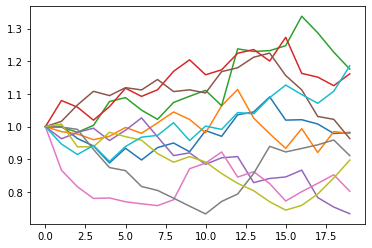

In [7]:
#Black-Scholes model trajectories
N=20 # time discretization
S0=1 # initial value of the stock
strike=1 # call option strike 
T=1.0 # maturity
sigma=0.2 # instantaneous volatility
R=10 # number of trajectories

logS= np.zeros((N,R))
logS[0,]=np.log(S0)*np.ones((1,R))

for i in range(R):
    for j in range(N-1):
        increment = np.random.normal(-(sigma)**2*T/(2*N),sigma*np.sqrt(T)/np.sqrt(N))
        logS[j+1,i] =logS[j,i]+increment

S=np.exp(logS)

for i in range(R):
   plt.plot(S[:,i])
plt.show()


In [8]:
import scipy.stats as scipy
from scipy.stats import norm

#Blackscholes price

def BS(S0, strike, T, sigma):
    return S0*scipy.norm.cdf((np.log(S0/strike)+0.5*T*sigma**2)/(np.sqrt(T)*sigma))-strike*scipy.norm.cdf((np.log(S0/strike)-0.5*T*sigma**2)/(np.sqrt(T)*sigma))

priceBS=BS(S0,strike,T,sigma)
print('Price of a Call option in the Black-Scholes model with initial price', S0, 'strike', strike, 'maturity', T , 'and volatility' , sigma, 'is equal to', BS(S0,strike,T,sigma))

Price of a Call option in the Black-Scholes model with initial price 1 strike 1 maturity 1.0 and volatility 0.2 is equal to 0.07965567455405798


In [9]:
#Neural networks for heding strategies

m = 1 # price dimension
d = 2 # number of layers in strategy
n = 32  # nodes in the first but last layers

# the architecture is the same for all networks
layers = []
for j in range(N):
    for i in range(d):
        if i < d-1:
            nodes = n
            layer = Dense(nodes, activation='tanh',trainable=True,
                      kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
                      bias_initializer='random_normal',
                      name=str(i)+str(j))
        else:
            nodes = m
            layer = Dense(nodes, activation='linear', trainable=True,
                          kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
                          bias_initializer='random_normal',
                          name=str(i)+str(j))
        layers = layers + [layer]


In [10]:
# Implementing the loss function
# Inputs are the training set below, containing the price S0, 
# the initial hedging being 0, and the increments of the log price process 
price = Input(shape=(m,))
hedge = Input(shape=(m,))

inputs = [price]+[hedge]


for j in range(N):
    strategy = price
    for k in range(d):
        strategy= layers[k+(j)*d](strategy) # strategy at j is the hedging strategy at j , i.e. the neural network g_j
    incr = Input(shape=(m,))
    logprice= Lambda(lambda x : K.log(x))(price)
    logprice = Add()([logprice, incr])
    pricenew=Lambda(lambda x : K.exp(x))(logprice)# creating the price at time j+1
    priceincr=Subtract()([pricenew, price])
    hedgenew = Multiply()([strategy, priceincr])
    #mult = Lambda(lambda x : K.sum(x,axis=1))(mult) # this is only used for m > 1
    hedge = Add()([hedge,hedgenew]) # building up the discretized stochastic integral
    inputs = inputs + [incr]
    price=pricenew
payoff= Lambda(lambda x : 0.5*(K.abs(x-strike)+x-strike) - priceBS)(price) 
outputs = Subtract()([payoff,hedge]) # payoff minus priceBS minus hedge

inputs = inputs
outputs= outputs

model_hedge = Model(inputs=inputs, outputs=outputs)

In [11]:
model_hedge.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 1)            0           input_1[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
add_1 (Add)                     (None, 1)            0           lambda_1[0][0]                   
                                                                 input_3[0][0]              

In [12]:
Ktrain = 2*10**4
initialprice = S0

# xtrain consists of the price S0, 
# the initial hedging being 0, and the increments of the log price process 
xtrain = ([initialprice*np.ones((Ktrain,m))] +
          [np.zeros((Ktrain,m))]+
          [np.random.normal(-(sigma)**2*T/(2*N),sigma*np.sqrt(T)/np.sqrt(N),(Ktrain,m)) for i in range(N)])

ytrain=np.zeros((Ktrain,1))

In [13]:
model_hedge.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
import matplotlib.pyplot as plt

for i in range(50):
    model_hedge.fit(x=xtrain,y=ytrain, epochs=1,verbose=True)
    # plt.hist(model_hedge.predict(xtrain))
    # plt.show()
    # print(np.mean(model_hedge.predict(xtrain)))


Epoch 1/1
20000/20000 [==============================] - 6s 288us/step - loss: 0.0465
Epoch 1/1
20000/20000 [==============================] - 4s 196us/step - loss: 0.0016
Epoch 1/1
20000/20000 [==============================] - 4s 196us/step - loss: 0.0010
Epoch 1/1
20000/20000 [==============================] - 5s 243us/step - loss: 8.1881e-04
Epoch 1/1
20000/20000 [==============================] - 4s 208us/step - loss: 7.6938e-04
Epoch 1/1
20000/20000 [==============================] - 5s 251us/step - loss: 7.4777e-04
Epoch 1/1
20000/20000 [==============================] - 4s 202us/step - loss: 7.3920e-04
Epoch 1/1
20000/20000 [==============================] - 5s 262us/step - loss: 7.2644e-04
Epoch 1/1
20000/20000 [==============================] - 5s 231us/step - loss: 7.0708e-04
Epoch 1/1
20000/20000 [==============================] - 4s 221us/step - loss: 7.0918e-04
Epoch 1/1
20000/20000 [==============================] - 4s 213us/step - loss: 6.9640e-04
Epoch 1/1
20000/20000

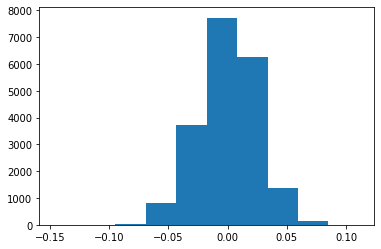

0.024311647
0.00015169817


In [15]:
Ltest = 10**4
        
xtest=([initialprice*np.ones((Ktrain,m))] +
          [np.zeros((Ktrain,m))]+
          [np.random.normal(-(sigma)**2*T/(2*N),(sigma)*np.sqrt(T)/np.sqrt(N),(Ktrain,m)) for i in range(N)])
plt.hist(model_hedge.predict(xtest))
plt.show()
print(np.std(model_hedge.predict(xtest)))
print(np.mean(model_hedge.predict(xtest)))

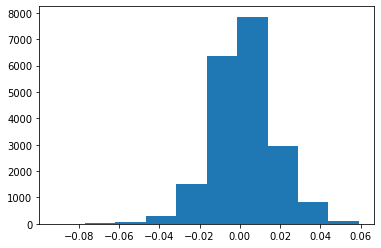

0.015363732906729648
0.0020116089476708747


In [16]:
logincrements = xtest[3:3+N]
hedge = np.zeros(Ktrain)
price = S0*np.ones((Ktrain,N))
for k in range(N-1):
    helper = logincrements[k][:,]
    helper = helper.transpose()
    price[:,k+1] = price[:,k]*np.exp(helper[:])
    hedge[:] = hedge[:] + scipy.norm.cdf((np.log(price[:,k]/strike)+0.5*(T-k*T/N)*sigma**2)/(np.sqrt(T-k*T/N)*sigma))*(price[:,k+1]-price[:,k])
hedge[:]= hedge[:]-0.5*(np.abs(price[:,N-1]-strike)+(price[:,N-1]-strike))+priceBS
plt.hist(hedge)
plt.show()
print(np.std(hedge))
print(np.mean(hedge))

In [17]:
weights = model_hedge.get_weights()
print(weights)

[array([[ 9.5596671e-01, -4.7520716e-02,  1.9026458e-01, -3.8663235e-02,
        -8.1236440e-01, -4.4235119e-01, -1.4270182e+00, -3.6302513e-01,
        -4.1077295e-01,  1.6689405e+00,  1.8359874e+00,  1.8473200e+00,
        -3.1046867e-01, -3.6048570e-01, -1.8408349e-03,  4.0424532e-01,
         8.2561457e-01,  5.1326931e-01, -4.9854311e-01, -5.1576889e-01,
        -1.3225565e+00,  8.9204013e-01, -2.7873999e-01,  3.2583511e-01,
        -2.4163849e+00,  1.2767252e+00,  2.1040885e-01,  3.7537217e-02,
        -8.6598498e-01, -5.7825267e-01,  1.3269818e-01,  7.3815882e-01]],
      dtype=float32), array([ 0.09669181,  0.04752072, -0.09858737,  0.03864537, -0.05006525,
        0.01682439,  0.14262998, -0.0922195 ,  0.07009333, -0.05715301,
        0.1178939 , -0.08720534, -0.09721095,  0.3154419 ,  0.00168816,
        0.07106197,  0.04121933, -0.01080892,  0.1187956 ,  0.14027311,
       -0.07285514,  0.03080114, -0.13045603, -0.3258351 ,  0.05364539,
       -0.24830966, -0.21040882, -0.037

In [18]:
#This works when the number of layers equals d=2

def deltastrategy(s,j):
    length=s.shape[0]
    g=np.zeros(length)
    for p in range(length):
        ghelper=np.tanh(s[p]*(weights[j*2*d])+weights[j*2*d+1])
        g[p]=np.sum(np.squeeze(weights[2*(d-1)+j*2*d])*np.squeeze(ghelper))
        g[p]=g[p]+weights[2*d-1+j*2*d]   
    return g



In [19]:
s=np.linspace(0.5,1.5,10)
k=10
y=deltastrategy(s,k)
z=scipy.norm.cdf((np.log(s/strike)+0.5*(T-k*T/N)*sigma**2)/(np.sqrt(T-k*T/N)*sigma))


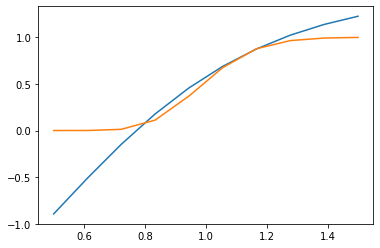

In [20]:
plt.plot(s,y,s,z)
plt.show()

The following offers an alternative to get also the hedging strategies by "predict"

In [21]:
#Definition of neural networks for heding strategies

m = 1 # dimension of price
d = 3 # number of layers in strategy
n = 8  # nodes in the first but last layers

# architecture is the same for all networks
layers = []
for j in range(N):
    for i in range(d):
        if i < d-1:
            nodes = n
            layer = Dense(nodes, activation='tanh',trainable=True,
                      kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
                      bias_initializer='random_normal',
                      name=str(i)+str(j))
        else:
            nodes = m
            layer = Dense(nodes, activation='linear', trainable=True,
                          kernel_initializer=initializers.RandomNormal(0,0.1),#kernel_initializer='random_normal',
                          bias_initializer='random_normal',
                          name=str(i)+str(j))
        layers = layers + [layer]

In [22]:
#Implementing the loss function
# Inputs is the training set below, containing the price S0, 
#the initial hedging being 0, and the increments of the log price process 
price = Input(shape=(m,))
hedge = Input(shape=(m,))
hedgeeval = Input(shape=(m,))
premium = Input(shape=(m,))

inputs = [price]+[hedge]+[hedgeeval]+[premium]
outputhelper=[]

premium = Dense(m, activation='linear', trainable=True,
                kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
                bias_initializer=initializers.RandomNormal(0,1))(premium)

for j in range(N):
    strategy = price
    strategyeval=hedgeeval
    for k in range(d):
        strategy= layers[k+(j)*d](strategy) # strategy at j is the hedging strategy at j , i.e. the neural network g_j
        strategyeval=layers[k+(j)*d](strategyeval)
    incr = Input(shape=(m,))
    logprice= Lambda(lambda x : K.log(x))(price)
    logprice = Add()([logprice, incr])
    pricenew=Lambda(lambda x : K.exp(x))(logprice)# creating the price at time j+1
    priceincr=Subtract()([pricenew, price])
    hedgenew = Multiply()([strategy, priceincr])
    #mult = Lambda(lambda x : K.sum(x,axis=1))(mult) # this is only used for m > 1
    hedge = Add()([hedge,hedgenew]) # building up the discretized stochastic integral
    inputs = inputs + [incr]
    outputhelper = outputhelper + [strategyeval]
    price=pricenew
payoff= Lambda(lambda x : 0.5*(K.abs(x-strike)+x-strike))(price) 
outputs = Subtract()([payoff,hedge]) 
outputs = Subtract()([outputs,premium]) # payoff minus price minus hedge 
outputs= [outputs] + outputhelper +[premium]
outputs = Concatenate()(outputs)

model_hedge_strat = Model(inputs=inputs, outputs=outputs)

In [23]:
Ktrain = 10**5
initialprice = S0

# xtrain consists of the price S0, 
# the initial hedging being 0, and the increments of the log price process 
xtrain = ([initialprice*np.ones((Ktrain,m))] +
          [np.zeros((Ktrain,m))]+
          [np.ones((Ktrain,m))] +
          [priceBS*np.ones((Ktrain,m))]+
          [np.random.normal(-(sigma)**2*T/(2*N),sigma*np.sqrt(T)/np.sqrt(N),(Ktrain,m)) for i in range(N)])

ytrain=np.zeros((Ktrain,1+N))

In [24]:
#import keras
from keras import losses
def custom_loss(y_true,y_pred):
    # return losses.mean_squared_error(y_true[0], y_pred[0])
    z = y_pred[:,0]-y_true[:,0]
    z=K.mean(K.square(z))
    return z

In [26]:
model_hedge_strat.compile(optimizer='adam',loss=custom_loss)

Epoch 1/1
100000/100000 [==============================] - 37s 368us/step - loss: 0.0513
Epoch 1/1
100000/100000 [==============================] - 40s 402us/step - loss: 5.4395e-04
Epoch 1/1
100000/100000 [==============================] - 38s 382us/step - loss: 3.7004e-04
Epoch 1/1
100000/100000 [==============================] - 32s 319us/step - loss: 3.0283e-04
Epoch 1/1
100000/100000 [==============================] - 38s 378us/step - loss: 2.7501e-04


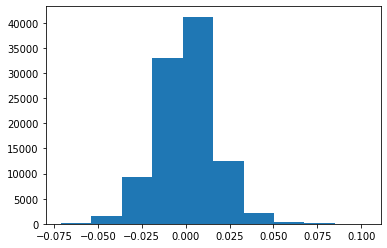

0.01612972
0.079383425


In [27]:
import matplotlib.pyplot as plt

for i in range(5):
    model_hedge_strat.fit(x=xtrain,y=ytrain, epochs=1,verbose=True)
plt.hist(model_hedge_strat.predict(xtrain)[:,0])
plt.show()
print(np.std(model_hedge_strat.predict(xtrain)[:,0]))
print(np.mean(model_hedge_strat.predict(xtrain)[:,N+1]))

In [28]:
Ktest=10
xtest = ([initialprice*np.ones((Ktest,m))] +
          [np.zeros((Ktest,m))]+
          [np.linspace(0.5,1.5,Ktest)] +# change this if you go to higher dimensions
          [priceBS*np.ones((Ktest,m))]+
          [np.random.normal(-(sigma)**2*T/(2*N),sigma*np.sqrt(T)/np.sqrt(N),(Ktest,m)) for i in range(N)])

y=model_hedge_strat.predict(xtest)[:,10]
print(y)

[-0.22522584 -0.15971118 -0.04699573  0.14006376  0.39974236  0.6612443
  0.84903955  0.9549834   1.0061073   1.0266126 ]


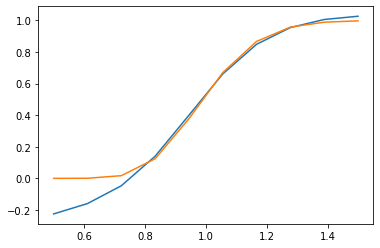

In [29]:
l = 9
s=np.linspace(0.5,1.5,Ktest)
z=scipy.norm.cdf((np.log(s/strike)+0.5*(T-l*T/N)*sigma**2)/(np.sqrt(T-l*T/N)*sigma))
#plt.plot(s,z)
#plt.plot(s,y)
plt.plot(s,y,s,z)
plt.show()

If we want to calculate indifference prices, we can use the second code (showing us also very explicitly the hedging strategies), but for an untrainable premium network: we shall just fix the premium network to be the identity and map different values (around reasonable prices) to the hedging portfolio. We also take as an input of the hedging strategy the initial capital, in order to parametrize the dependence on the initial capital.

Additionally we have to change the loss function from mean square to an everywhere defined utility function $ u $, i.e. a concave, increasing function with argument space the whole real line. Think for instance of $ x \mapsto 1 - \exp(-x) $.

Let $p_s$ denote the indifference price (of the seller) of the option (given no additional investment into a portfolio). Then the goal is solve the following optimization problem 
$$
u(0) = \sup_{H \text{ predictable }}\mathbb{E}\big[ u(- f(S_T) + p_s + (H\bullet S)_T) \big],
$$
where $(H_t)$ ranges over all predictable process and $(H \bullet S)_T= \int_0^T H_t dS_t$ denotes the stochastic Ito integral, i.e.~the seller wants to receive a premimum $p_s$ for having the liability in its books and hedging it by self-financing portfolio (given by $H$). The indifference price $p_b$ of the buyer satisfies in contrast
$$
u(0) = \sup_{H \text{ predictable }}\mathbb{E}\big[ u(f(S_T) - p_b - (H\bullet S)_T) \big],
$$
where the buyer is willing to pay $p_b$ to obtain the asset $f(S_T)$ instead of mimicking it by a portfolio on her own. The price of the seller will be higher than previously calculated price with the $L^2$ criterion, whereas the price of the buyer will be smaller.

In [30]:
#Definition of neural networks for heding strategies

m = 1 # dimension of price
d = 3 # number of layers in strategy
n = 8  # nodes in the first but last layers

# architecture is the same for all networks
layers = []
for j in range(N):
    for i in range(d):
        if i < d-1:
            nodes = n
            layer = Dense(nodes, activation='tanh',trainable=True,
                      kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
                      bias_initializer='random_normal',
                      name=str(i)+str(j))
        else:
            nodes = m
            layer = Dense(nodes, activation='linear', trainable=True,
                          kernel_initializer=initializers.RandomNormal(0,0.1),#kernel_initializer='random_normal',
                          bias_initializer='random_normal',
                          name=str(i)+str(j))
        layers = layers + [layer]

In [31]:
#Implementing the loss function
# Inputs is the training set below, containing the price S0, 
#the initial hedging being 0, and the increments of the log price process 
price = Input(shape=(m,))
hedge = Input(shape=(m,))
hedgeeval = Input(shape=(m,))
premium = Input(shape=(m,))

inputs = [price]+[hedge]+[hedgeeval]+[premium]
outputhelper=[]

premium = Dense(m, activation='linear', trainable=False,
                kernel_initializer=initializers.RandomNormal(1.0,0.0),#kernel_initializer='random_normal',
                bias_initializer=initializers.RandomNormal(0.0,0.0))(premium)

for j in range(N):
    strategy = Concatenate()([price,premium])
    strategyeval=Concatenate()([hedgeeval,premium])
    for k in range(d):
        strategy= layers[k+(j)*d](strategy) # strategy at j is the hedging strategy at j , i.e. the neural network g_j
        strategyeval=layers[k+(j)*d](strategyeval)
    incr = Input(shape=(m,))
    logprice= Lambda(lambda x : K.log(x))(price)
    logprice = Add()([logprice, incr])
    pricenew=Lambda(lambda x : K.exp(x))(logprice)# creating the price at time j+1
    priceincr=Subtract()([pricenew, price])
    hedgenew = Multiply()([strategy, priceincr])
    #mult = Lambda(lambda x : K.sum(x,axis=1))(mult) # this is only used for m > 1
    hedge = Add()([hedge,hedgenew]) # building up the discretized stochastic integral
    inputs = inputs + [incr]
    outputhelper = outputhelper + [strategyeval]
    price=pricenew
payoff= Lambda(lambda x : 0.5*(K.abs(x-strike)+x-strike))(price) 
outputs = Subtract()([payoff,hedge]) 
outputs = Subtract()([outputs,premium]) # payoff minus price minus hedge 
outputs= [outputs] + outputhelper +[premium]
outputs = Concatenate()(outputs)

model_hedge_strat = Model(inputs=inputs, outputs=outputs)

In [32]:
Ktrain = 10**5
initialprice = S0

# xtrain consists of the price S0, 
#the initial hedging being 0, and the increments of the log price process 
xtrain = ([initialprice*np.ones((Ktrain,m))] +
          [np.zeros((Ktrain,m))]+
          [np.ones((Ktrain,m))] +
          [priceBS*np.linspace(0.5,1.5,Ktrain)]+
          [np.random.normal(-(sigma)**2*T/(2*N),sigma*np.sqrt(T)/np.sqrt(N),(Ktrain,m)) for i in range(N)])

ytrain=np.zeros((Ktrain,1+N))

In [33]:
#import keras
from keras import losses
def custom_loss(y_true,y_pred):
    #return losses.mean_squared_error(y_true[0], y_pred[0])
    z = y_pred[:,0]-y_true[:,0]
    z=K.mean(K.exp(-z))
    return z

In [34]:
model_hedge_strat.compile(optimizer='adam',loss=custom_loss)

Epoch 1/1
100000/100000 [==============================] - 40s 404us/step - loss: 1.00340s - l
Epoch 1/1
100000/100000 [==============================] - 33s 335us/step - loss: 1.0024
Epoch 1/1
100000/100000 [==============================] - 34s 343us/step - loss: 1.0020
Epoch 1/1
100000/100000 [==============================] - 33s 329us/step - loss: 1.0016
Epoch 1/1
100000/100000 [==============================] - 35s 349us/step - loss: 1.0015


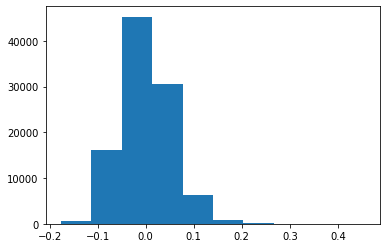

0.052279204
0.07965567


In [35]:
import matplotlib.pyplot as plt

for i in range(5):
    model_hedge_strat.fit(x=xtrain,y=ytrain, epochs=1,verbose=True)
plt.hist(model_hedge_strat.predict(xtrain)[:,0])
plt.show()
print(np.std(model_hedge_strat.predict(xtrain)[:,0]))
print(np.mean(model_hedge_strat.predict(xtrain)[:,N+1]))

In [36]:
Ktest = 10**5
for x in np.linspace(0.98,1.0,10):
    xtest = ([initialprice*np.ones((Ktest,m))] +
              [np.zeros((Ktest,m))]+
              [np.linspace(0.5,1.5,Ktest)] +#change this if you go to higher dimensions
              [priceBS*x*np.ones((Ktest,m))]+
              [np.random.normal(-(sigma)**2*T/(2*N),sigma*np.sqrt(T)/np.sqrt(N),(Ktest,m)) for i in range(N)])
    y=np.mean(np.exp(-model_hedge_strat.predict(xtest)[:,0]))
    print(y)

0.99925333
0.999653
0.99987084
1.0001674
1.0001584
1.0004177
1.0005379
1.000986
1.0010914
1.001262


# Conclusions
We showed with simulated data how Deep Learning and TensorFlow can be applied to a popular mathematical finance model. The simulated data can easily be substituted with real data (see the zip file in the repo for such). However, in our experiments we saw that it is the simulated data that shows well the power of DL in hedging.
We clearly demonstrated that DL gives good results. Plenty of additional work is yet on the way: e.g. it is important to be shown to what extent the DL is superior to more advanced models than the basic Black-Scholes one (Heston, SABR, etc.). In such a case, working with real data is a necessity. Such research is still at a nascent stage in the literature.
The focus of our project was the use of TensorFlow in a DL problem and not so much the delicate financial issues which occur. We skipped them for convenience of the exposition, which is another motivation to work with simulated data giving a priority to the mathematical formulation of the problem.
